### Regression - Price Predict ###

In [46]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
X_test = load_dataset('test.csv')
X_train = load_dataset('train.csv')
y_test = load_dataset('y_test.csv')
y_train = load_dataset('y_train.csv')

X_train = X_train[:-1]
X_test = X_test[:-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(10497, 16)
(10497, 1)
(4499, 16)
(4499, 1)


In [47]:
#agrupem i visualitzem les dades test
test=X_test.assign(Price=y_test)
test.head()
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,2.849,1.107,1.399,2.937,1.486,3.426,52.365,4.889,2.820,18.010,2.993,0.843,0.157,0.778,0.217,0.006,130.806
std,1.230,0.299,0.826,8.796,0.905,11.313,0.016,0.035,5.115,34.887,1.590,0.364,0.364,0.416,0.412,0.074,63.967
min,1.000,0.000,0.000,1.000,1.000,0.000,52.291,4.775,1.000,0.000,0.213,0.000,0.000,0.000,0.000,0.000,23.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.864,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.887,2.000,7.000,2.854,1.000,0.000,1.000,0.000,0.000,117.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,16.000,4.000,10.000,91.000,16.000,106.000,52.425,5.028,180.000,408.000,11.593,1.000,1.000,1.000,1.000,1.000,433.000


In [48]:
#agrupem i visualitzem les dades train
train=X_train.assign(Price=y_train)
train.head()
#train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.000,2.000,1,1,1.000,52.358,4.934,2,8,3.279,1,0,1,0,0,120.000
1,4,1.000,2.000,1,2,1.000,52.364,4.983,3,0,5.952,1,0,1,0,0,99.000
2,2,1.000,1.000,1,1,1.000,52.375,4.862,3,8,2.601,1,0,1,0,0,100.000
3,2,1.000,1.000,1,1,1.000,52.387,4.890,2,41,1.095,1,0,0,1,0,175.000
4,2,1.000,1.000,1,1,1.000,52.384,4.890,3,0,0.844,1,0,1,0,0,119.000


In [49]:
# Traiem la columna 'instant_bookable_f', ja que és redundant amb 'instant_bookable_t'
train=train.drop(['instant_bookable_f'], axis=1)
test=test.drop(['instant_bookable_f'], axis=1)
X_train=X_train.drop(['instant_bookable_f'], axis=1)
X_test=X_test.drop(['instant_bookable_f'], axis=1)

In [50]:
# mirem si hi ha valors nulls
train.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [51]:
# mirem que no té cap null
train.notnull().sum()

accommodates                      10497
bathrooms                         10497
bedrooms                          10497
calculated_host_listings_count    10497
guests_included                   10497
host_listings_count               10497
latitude                          10497
longitude                         10497
minimum_nights                    10497
number_of_reviews                 10497
d_centre                          10497
instant_bookable_t                10497
room_type_Entire home/apt         10497
room_type_Private room            10497
room_type_Shared room             10497
Price                             10497
dtype: int64

In [52]:
# mirem si te NaN's
train.isna().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [53]:
# mirem la correlació de les dades amb el preu
train.corr()['Price']

accommodates                     -0.002
bathrooms                         0.002
bedrooms                         -0.005
calculated_host_listings_count   -0.002
guests_included                   0.012
host_listings_count              -0.004
latitude                          0.010
longitude                         0.015
minimum_nights                   -0.005
number_of_reviews                 0.003
d_centre                         -0.014
instant_bookable_t                0.003
room_type_Entire home/apt         0.003
room_type_Private room           -0.000
room_type_Shared room            -0.019
Price                             1.000
Name: Price, dtype: float64

In [54]:
corr = train.corr()
priceCorr = corr.Price.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 Price                1.000
longitude            0.015
guests_included      0.012
latitude             0.010
instant_bookable_t   0.003
Name: Price, dtype: float64 

Most Negative Correlations
 host_listings_count     -0.004
bedrooms                -0.005
minimum_nights          -0.005
d_centre                -0.014
room_type_Shared room   -0.019
Name: Price, dtype: float64


<IPython.core.display.Javascript object>


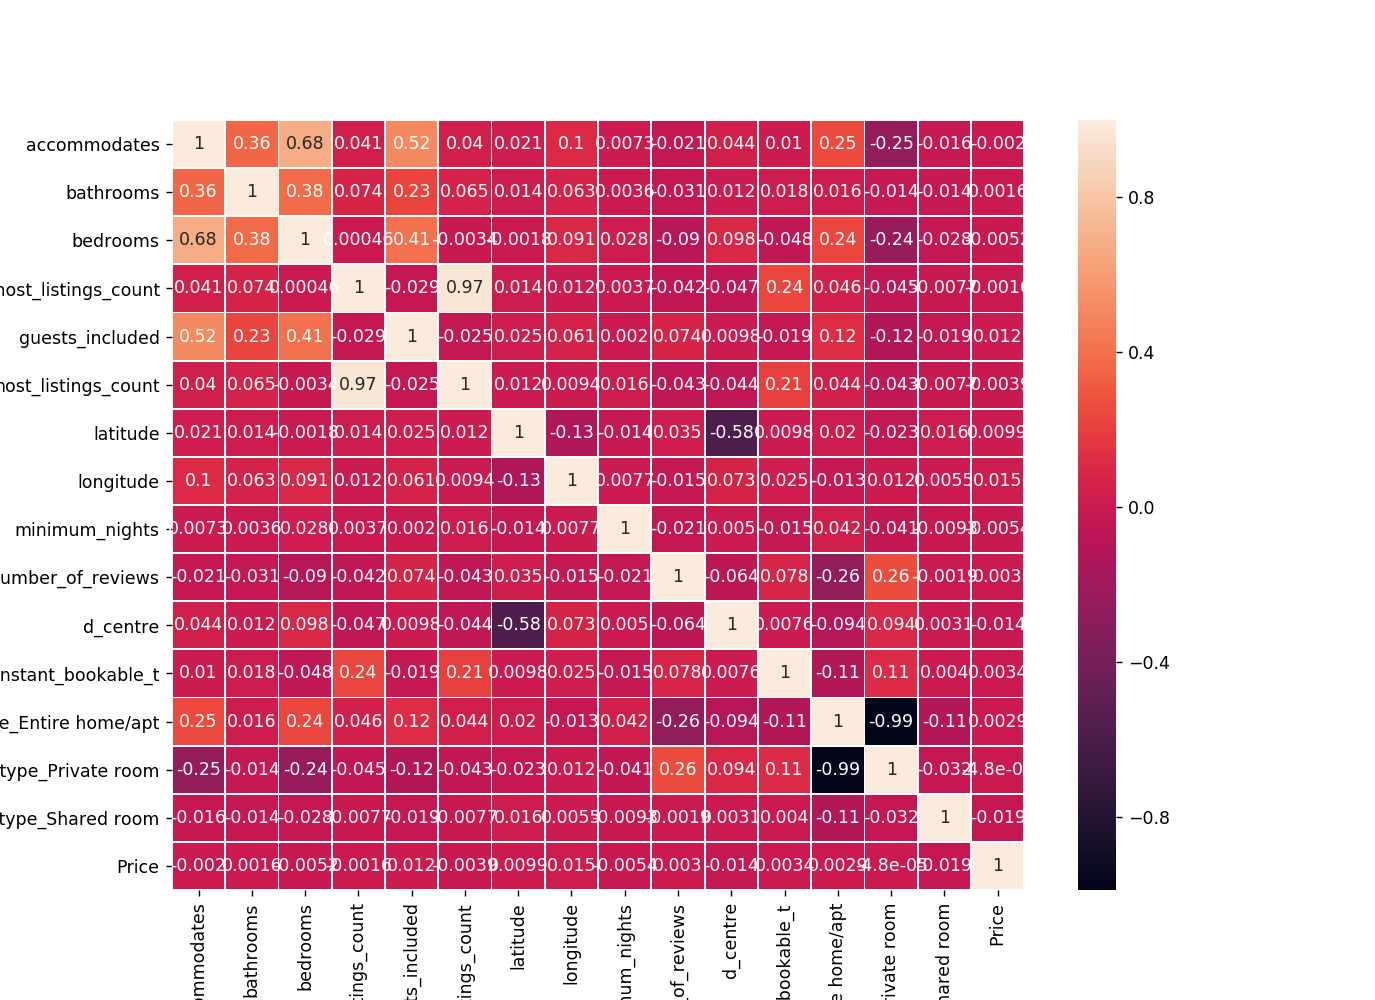

In [55]:
import seaborn as sns

#Mirem la correlació entre els atributs d'entrada per entendre millor les dades
#train_binary=train
#train_binary.head()
    
correlacio = train.corr()

plt.figure(figsize=(11,8))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


In [11]:
#relacio = sns.pairplot(train)

Primer fem la predicció amb les dades no normalitzades

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt

In [57]:
#split by the most correlated features
X_Correlated_train =pd.DataFrame(X_train, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])
X_Correlated_test =pd.DataFrame(X_test, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])

print("shape correlated train: ", X_Correlated_train.shape)
print("shape correlated test: ", X_Correlated_test.shape)

X_Most_Correlated_train =pd.DataFrame(X_train, columns=['room_type_Shared room'])
X_Most_Correlated_test =pd.DataFrame(X_test, columns=['room_type_Shared room'])


shape correlated train:  (10497, 5)
shape correlated test:  (4499, 5)


1. Linear Regression multiple amb totes les dades, les que més correlacionen i la que més correlaciona.

In [58]:
# Linear regression with all features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)


print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4059.9299955221477
Error mitjà de test:  4102.732010893085
R2 d'entrenament:  0.0012167583713048602
R2 de test:  -0.002906164877447992


In [59]:
# Linear regression with correlated features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Correlated_train, y_train)

y_train_predicted_Correlated = linear_regression.predict(X_Correlated_train)
y_test_predicted_Correlated = linear_regression.predict(X_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4061.0384570514393
Error mitjà de test:  4097.2402595991525
R2 d'entrenament:  0.0009440657877708425
R2 de test:  -0.0015637152087795148


In [60]:
# Linear regression with the most correlated feature

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Most_Correlated_train, y_train)

y_train_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_train)
y_test_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Most_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Most_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Most_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [61]:
df = y_test.assign(y_predicted=y_test_predicted, y_predicted_correlated=y_test_predicted_Correlated, y_predicted_most_correlated = y_test_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,129.399,129.316,129.805
1,134.000,131.024,130.784,129.805
2,195.000,128.535,131.668,129.805
3,80.000,123.359,124.308,129.805
4,120.000,131.011,130.606,129.805
5,99.000,127.345,127.887,129.805
6,60.000,129.083,128.482,129.805
7,280.000,130.350,129.151,129.805
8,275.000,129.567,130.966,129.805
9,189.000,122.029,123.680,129.805


<IPython.core.display.Javascript object>


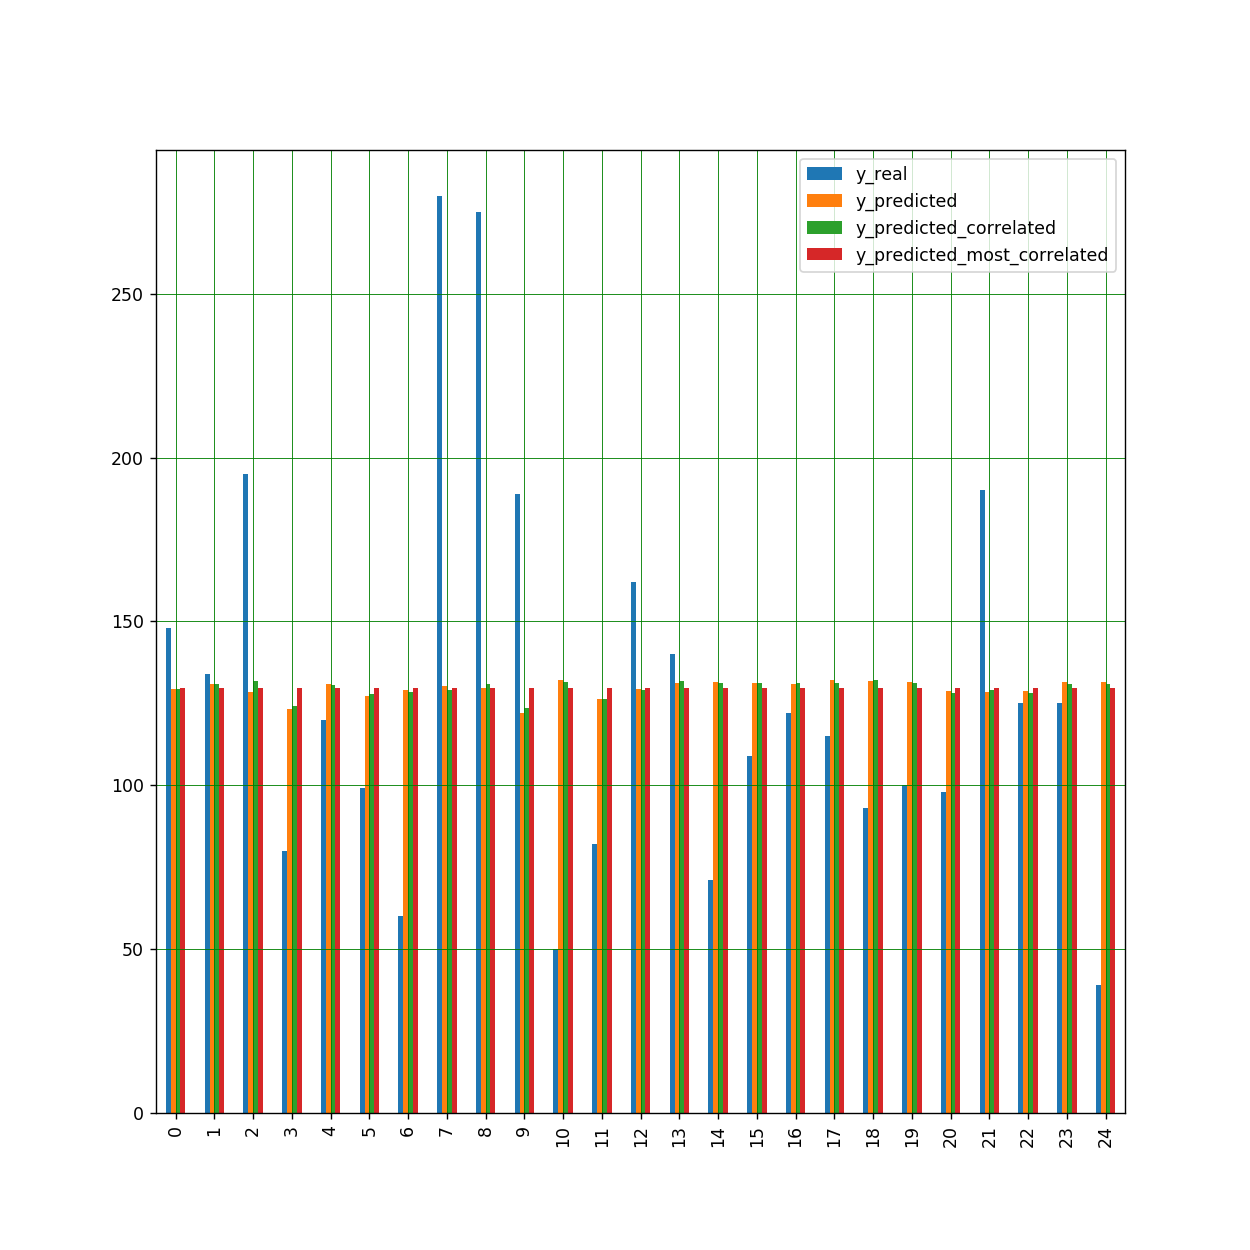

In [62]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2. Multifeature polinomial regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [64]:
#Multi-featrues polinomial regression with all the featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4027.3645482780344
Error mitjà de test:  4133.444444979104
R2 d'entrenament:  0.009228182952378372
R2 de test:  -0.010413769420342778


In [65]:
#Multi-featrues polinomial regression with correlated featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Correlated_train)
X_poly_test = poly.fit_transform(X_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)



Error mitjà d'entrenament:  4058.0030998577786
Error mitjà de test:  4105.4640064505975
R2 d'entrenament:  0.0016907939088786073
R2 de test:  -0.0035739967464980538


In [66]:
#Multi-featrues polinomial regression with the most correlated featrue

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Most_Correlated_train)
X_poly_test = poly.fit_transform(X_Most_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Most_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Most_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Most_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [67]:
df = y_test.assign(y_predicted=poly_test_y_predicted, y_predicted_correlated=poly_test_y_predicted_Correlated, y_predicted_most_correlated = poly_test_y_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,126.546,127.589,129.805
1,134.000,131.812,131.536,129.805
2,195.000,125.009,130.667,129.805
3,80.000,123.225,122.563,129.805
4,120.000,128.596,128.864,129.805
5,99.000,126.166,128.701,129.805
6,60.000,129.744,128.999,129.805
7,280.000,131.511,128.416,129.805
8,275.000,127.994,131.398,129.805
9,189.000,125.401,120.465,129.805


<IPython.core.display.Javascript object>


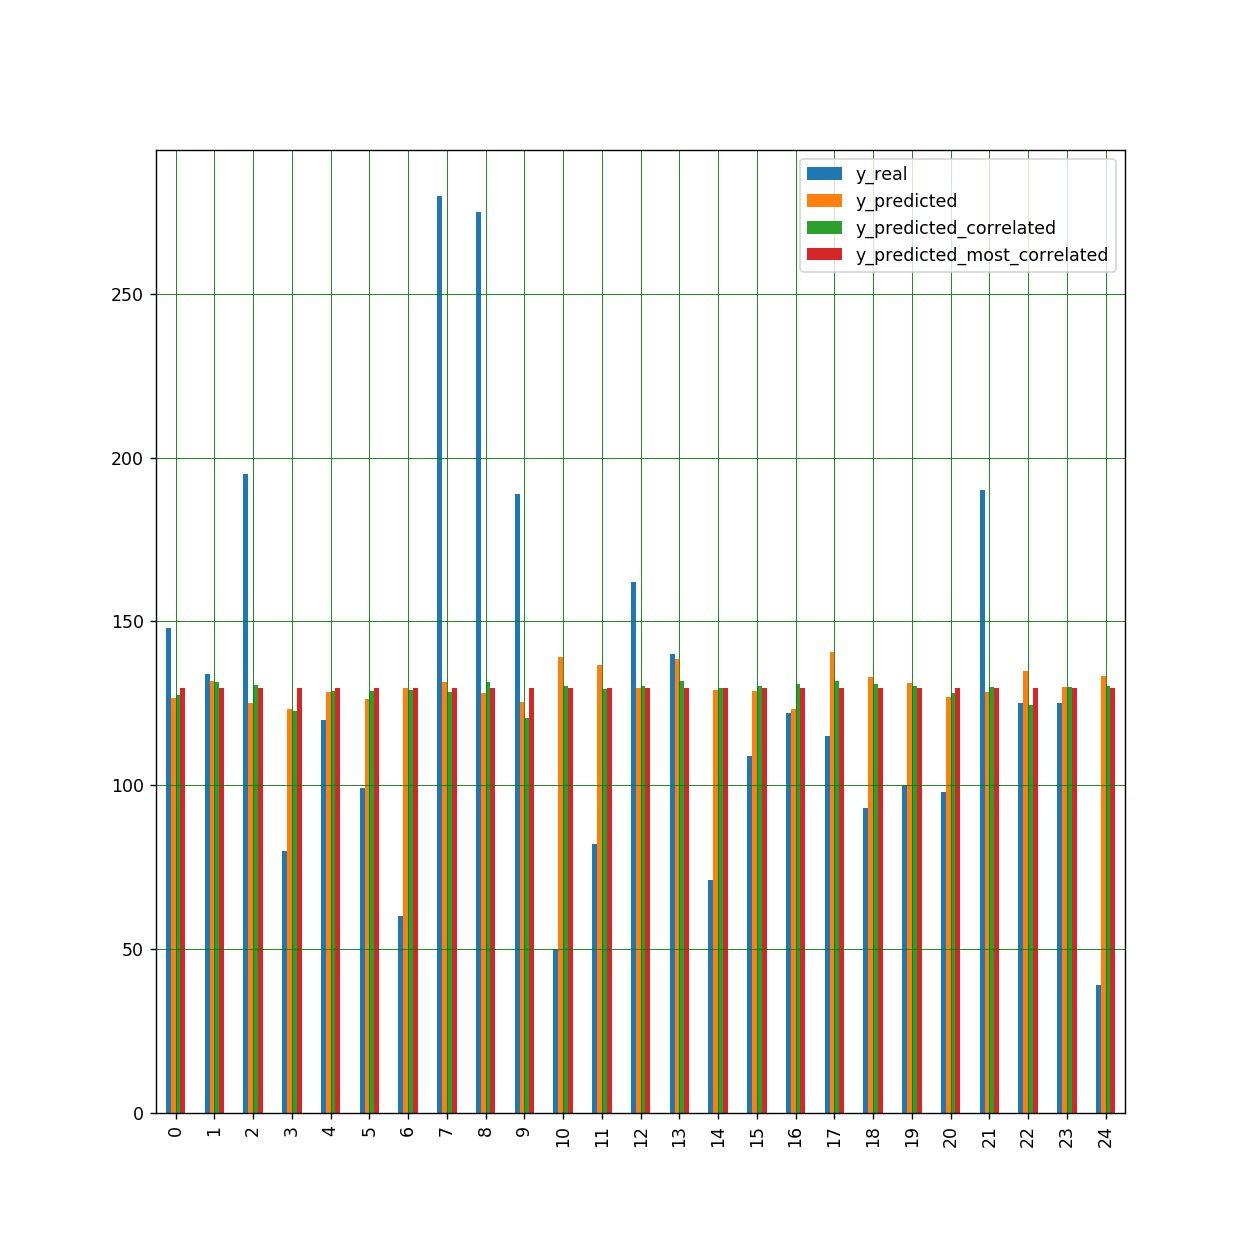

In [68]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

El resultat obtingut és amb polinomis de grau 2, i veiem que és pitjor que amb un regressor lineal. I si augmentem els graus pitjor és el resultat fins al punt que no es pot calcular (grau 4)

3. KNN regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_test=[]
accuracy_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test, test_predicted))
    train_MSD.append(mean_squared_error(y_train, train_predicted))

<IPython.core.display.Javascript object>


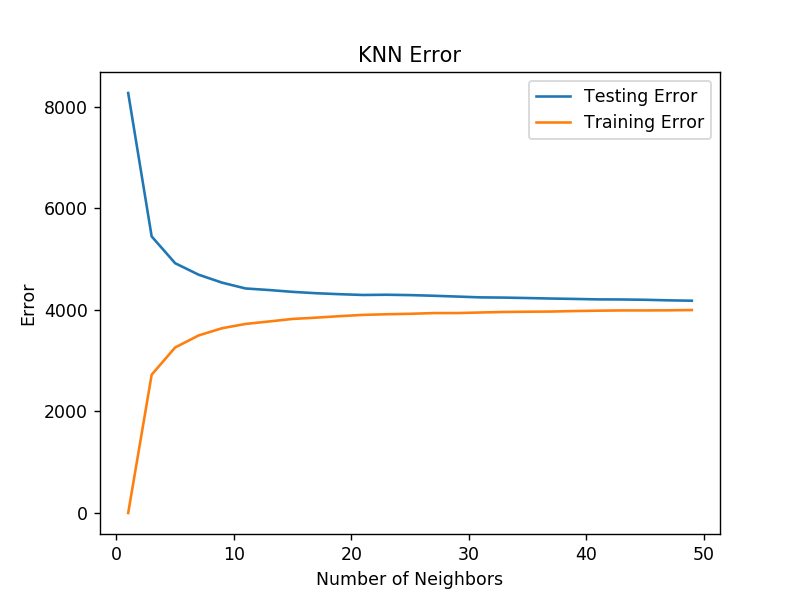

In [70]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  869.646031247023
Error mitjà de test:  4797.563536341409
R2 d'entrenament:  0.7860584091064551
R2 de test:  -0.1727566007755592


<IPython.core.display.Javascript object>


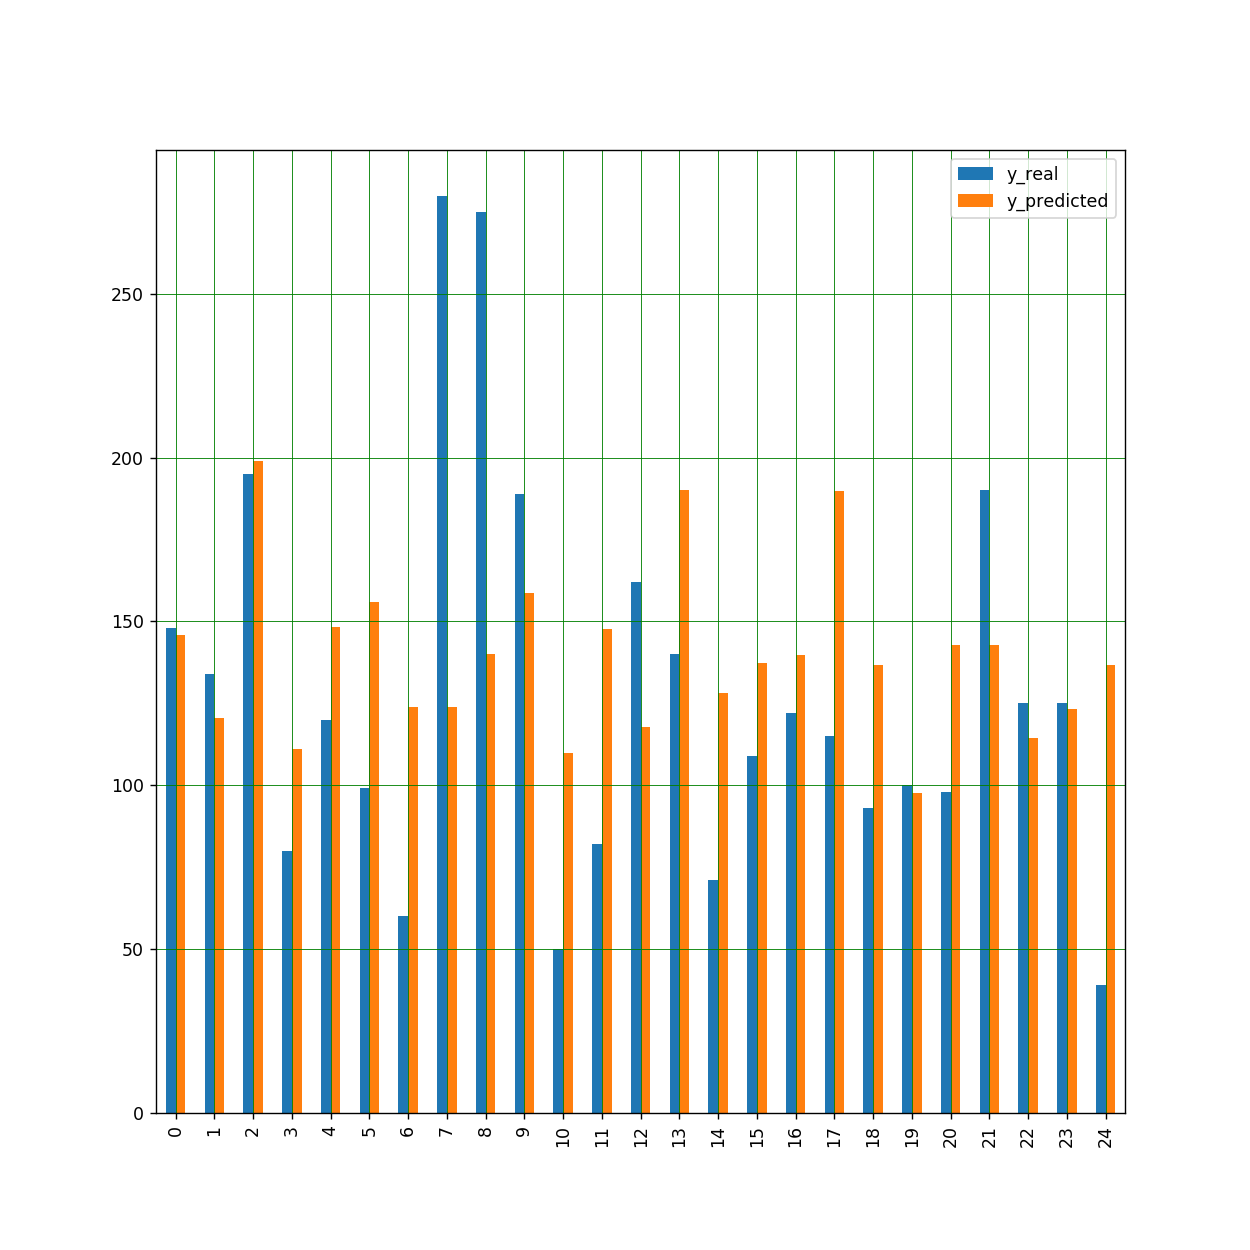

In [87]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


df = y_test.assign(y_predicted=test_predicted)
df = df.rename(columns={'59.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



In [73]:
# importing Pool
from catboost import Pool, CatBoostRegressor
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test,label=y_test)

In [88]:
#build model
cat_model = CatBoostRegressor(loss_function="RMSE")
# Fit model 
cat_model.fit( X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073655
0:	learn: 63.7437397	test: 63.9708473	best: 63.9708473 (0)	total: 13.5ms	remaining: 13.5s
1:	learn: 63.7332138	test: 63.9731741	best: 63.9708473 (0)	total: 25.1ms	remaining: 12.5s
2:	learn: 63.7149000	test: 63.9661916	best: 63.9661916 (2)	total: 36.9ms	remaining: 12.3s
3:	learn: 63.7052583	test: 63.9683769	best: 63.9661916 (2)	total: 48.8ms	remaining: 12.2s
4:	learn: 63.6856427	test: 63.9672977	best: 63.9661916 (2)	total: 60.6ms	remaining: 12.1s
5:	learn: 63.6808481	test: 63.9656944	best: 63.9656944 (5)	total: 72.3ms	remaining: 12s
6:	learn: 63.6639420	test: 63.9677804	best: 63.9656944 (5)	total: 84.5ms	remaining: 12s
7:	learn: 63.6534005	test: 63.9738892	best: 63.9656944 (5)	total: 97.1ms	remaining: 12s
8:	learn: 63.6320316	test: 63.9795325	best: 63.9656944 (5)	total: 108ms	remaining: 11.9s
9:	learn: 63.6062272	test: 63.9763736	best: 63.9656944 (5)	total: 120ms	remaining: 11.9s
10:	learn: 63.5976801	test: 63.9734527	best: 63.9656944 (5)	total: 132ms	remai

112:	learn: 62.5745925	test: 64.1390118	best: 63.9656944 (5)	total: 824ms	remaining: 6.47s
113:	learn: 62.5654306	test: 64.1431892	best: 63.9656944 (5)	total: 832ms	remaining: 6.46s
114:	learn: 62.5557376	test: 64.1365492	best: 63.9656944 (5)	total: 856ms	remaining: 6.59s
115:	learn: 62.5488788	test: 64.1350538	best: 63.9656944 (5)	total: 861ms	remaining: 6.56s
116:	learn: 62.5403980	test: 64.1348534	best: 63.9656944 (5)	total: 867ms	remaining: 6.54s
117:	learn: 62.5162674	test: 64.1374656	best: 63.9656944 (5)	total: 872ms	remaining: 6.51s
118:	learn: 62.4942219	test: 64.1438768	best: 63.9656944 (5)	total: 877ms	remaining: 6.49s
119:	learn: 62.4865033	test: 64.1424792	best: 63.9656944 (5)	total: 882ms	remaining: 6.46s
120:	learn: 62.4792145	test: 64.1458168	best: 63.9656944 (5)	total: 887ms	remaining: 6.44s
121:	learn: 62.4647577	test: 64.1518040	best: 63.9656944 (5)	total: 892ms	remaining: 6.42s
122:	learn: 62.4560735	test: 64.1527244	best: 63.9656944 (5)	total: 897ms	remaining: 6.39s

226:	learn: 60.9567004	test: 64.2980389	best: 63.9656944 (5)	total: 1.5s	remaining: 5.1s
227:	learn: 60.9449548	test: 64.2986775	best: 63.9656944 (5)	total: 1.5s	remaining: 5.09s
228:	learn: 60.9330730	test: 64.2993339	best: 63.9656944 (5)	total: 1.51s	remaining: 5.09s
229:	learn: 60.9182954	test: 64.3026233	best: 63.9656944 (5)	total: 1.52s	remaining: 5.08s
230:	learn: 60.9032416	test: 64.3023475	best: 63.9656944 (5)	total: 1.52s	remaining: 5.07s
231:	learn: 60.8960267	test: 64.3026010	best: 63.9656944 (5)	total: 1.53s	remaining: 5.07s
232:	learn: 60.8873559	test: 64.3013063	best: 63.9656944 (5)	total: 1.54s	remaining: 5.06s
233:	learn: 60.8770186	test: 64.3061781	best: 63.9656944 (5)	total: 1.54s	remaining: 5.05s
234:	learn: 60.8668754	test: 64.3102686	best: 63.9656944 (5)	total: 1.55s	remaining: 5.04s
235:	learn: 60.8557758	test: 64.3144427	best: 63.9656944 (5)	total: 1.56s	remaining: 5.04s
236:	learn: 60.8424418	test: 64.3176866	best: 63.9656944 (5)	total: 1.56s	remaining: 5.03s
23

330:	learn: 59.6440836	test: 64.5163280	best: 63.9656944 (5)	total: 2.17s	remaining: 4.38s
331:	learn: 59.6292782	test: 64.5097581	best: 63.9656944 (5)	total: 2.17s	remaining: 4.37s
332:	learn: 59.6207265	test: 64.5174848	best: 63.9656944 (5)	total: 2.18s	remaining: 4.36s
333:	learn: 59.6113357	test: 64.5257592	best: 63.9656944 (5)	total: 2.18s	remaining: 4.35s
334:	learn: 59.6022936	test: 64.5255549	best: 63.9656944 (5)	total: 2.19s	remaining: 4.34s
335:	learn: 59.5816664	test: 64.5203687	best: 63.9656944 (5)	total: 2.19s	remaining: 4.33s
336:	learn: 59.5667682	test: 64.5260387	best: 63.9656944 (5)	total: 2.2s	remaining: 4.33s
337:	learn: 59.5565410	test: 64.5279882	best: 63.9656944 (5)	total: 2.2s	remaining: 4.32s
338:	learn: 59.5463646	test: 64.5285223	best: 63.9656944 (5)	total: 2.21s	remaining: 4.31s
339:	learn: 59.5368055	test: 64.5301774	best: 63.9656944 (5)	total: 2.21s	remaining: 4.3s
340:	learn: 59.5310899	test: 64.5276099	best: 63.9656944 (5)	total: 2.22s	remaining: 4.29s
34

440:	learn: 58.5461084	test: 64.6665150	best: 63.9656944 (5)	total: 2.84s	remaining: 3.6s
441:	learn: 58.5424727	test: 64.6690739	best: 63.9656944 (5)	total: 2.85s	remaining: 3.59s
442:	learn: 58.5342792	test: 64.6757837	best: 63.9656944 (5)	total: 2.85s	remaining: 3.58s
443:	learn: 58.5231233	test: 64.6789672	best: 63.9656944 (5)	total: 2.85s	remaining: 3.58s
444:	learn: 58.5229969	test: 64.6790414	best: 63.9656944 (5)	total: 2.86s	remaining: 3.57s
445:	learn: 58.5092598	test: 64.6791496	best: 63.9656944 (5)	total: 2.86s	remaining: 3.56s
446:	learn: 58.5003683	test: 64.6792910	best: 63.9656944 (5)	total: 2.87s	remaining: 3.55s
447:	learn: 58.4898554	test: 64.6836997	best: 63.9656944 (5)	total: 2.88s	remaining: 3.54s
448:	learn: 58.4831650	test: 64.6846451	best: 63.9656944 (5)	total: 2.88s	remaining: 3.53s
449:	learn: 58.4735886	test: 64.6874835	best: 63.9656944 (5)	total: 2.88s	remaining: 3.52s
450:	learn: 58.4505380	test: 64.6934030	best: 63.9656944 (5)	total: 2.89s	remaining: 3.52s


553:	learn: 57.4889711	test: 64.8801510	best: 63.9656944 (5)	total: 3.51s	remaining: 2.82s
554:	learn: 57.4684124	test: 64.8833290	best: 63.9656944 (5)	total: 3.51s	remaining: 2.82s
555:	learn: 57.4512369	test: 64.8884114	best: 63.9656944 (5)	total: 3.52s	remaining: 2.81s
556:	learn: 57.4439322	test: 64.8915348	best: 63.9656944 (5)	total: 3.53s	remaining: 2.81s
557:	learn: 57.4376649	test: 64.8925265	best: 63.9656944 (5)	total: 3.53s	remaining: 2.8s
558:	learn: 57.4288116	test: 64.8980906	best: 63.9656944 (5)	total: 3.54s	remaining: 2.79s
559:	learn: 57.4155881	test: 64.9085373	best: 63.9656944 (5)	total: 3.55s	remaining: 2.79s
560:	learn: 57.4155194	test: 64.9084450	best: 63.9656944 (5)	total: 3.55s	remaining: 2.78s
561:	learn: 57.4087173	test: 64.9112830	best: 63.9656944 (5)	total: 3.56s	remaining: 2.77s
562:	learn: 57.3926678	test: 64.9132884	best: 63.9656944 (5)	total: 3.57s	remaining: 2.77s
563:	learn: 57.3810576	test: 64.9151566	best: 63.9656944 (5)	total: 3.57s	remaining: 2.76s


645:	learn: 56.7069577	test: 65.0016710	best: 63.9656944 (5)	total: 4.2s	remaining: 2.3s
646:	learn: 56.7027873	test: 65.0063473	best: 63.9656944 (5)	total: 4.2s	remaining: 2.29s
647:	learn: 56.6915675	test: 65.0056135	best: 63.9656944 (5)	total: 4.21s	remaining: 2.29s
648:	learn: 56.6729828	test: 65.0112040	best: 63.9656944 (5)	total: 4.21s	remaining: 2.28s
649:	learn: 56.6618090	test: 65.0183434	best: 63.9656944 (5)	total: 4.22s	remaining: 2.27s
650:	learn: 56.6549386	test: 65.0208531	best: 63.9656944 (5)	total: 4.22s	remaining: 2.27s
651:	learn: 56.6459721	test: 65.0257884	best: 63.9656944 (5)	total: 4.23s	remaining: 2.26s
652:	learn: 56.6379983	test: 65.0304440	best: 63.9656944 (5)	total: 4.24s	remaining: 2.25s
653:	learn: 56.6242931	test: 65.0299730	best: 63.9656944 (5)	total: 4.24s	remaining: 2.25s
654:	learn: 56.6139358	test: 65.0333303	best: 63.9656944 (5)	total: 4.25s	remaining: 2.24s
655:	learn: 56.6138613	test: 65.0331389	best: 63.9656944 (5)	total: 4.26s	remaining: 2.23s
65

744:	learn: 55.8967813	test: 65.1315527	best: 63.9656944 (5)	total: 5.06s	remaining: 1.73s
745:	learn: 55.8867120	test: 65.1321790	best: 63.9656944 (5)	total: 5.07s	remaining: 1.72s
746:	learn: 55.8745783	test: 65.1312613	best: 63.9656944 (5)	total: 5.07s	remaining: 1.72s
747:	learn: 55.8639533	test: 65.1276378	best: 63.9656944 (5)	total: 5.08s	remaining: 1.71s
748:	learn: 55.8542739	test: 65.1278937	best: 63.9656944 (5)	total: 5.09s	remaining: 1.71s
749:	learn: 55.8476262	test: 65.1296277	best: 63.9656944 (5)	total: 5.1s	remaining: 1.7s
750:	learn: 55.8475876	test: 65.1296972	best: 63.9656944 (5)	total: 5.11s	remaining: 1.69s
751:	learn: 55.8412379	test: 65.1292170	best: 63.9656944 (5)	total: 5.12s	remaining: 1.69s
752:	learn: 55.8348233	test: 65.1314414	best: 63.9656944 (5)	total: 5.13s	remaining: 1.68s
753:	learn: 55.8347828	test: 65.1314654	best: 63.9656944 (5)	total: 5.14s	remaining: 1.68s
754:	learn: 55.8326806	test: 65.1309876	best: 63.9656944 (5)	total: 5.14s	remaining: 1.67s
7

852:	learn: 55.0506672	test: 65.2247289	best: 63.9656944 (5)	total: 6.01s	remaining: 1.04s
853:	learn: 55.0357261	test: 65.2252024	best: 63.9656944 (5)	total: 6.02s	remaining: 1.03s
854:	learn: 55.0263560	test: 65.2241361	best: 63.9656944 (5)	total: 6.03s	remaining: 1.02s
855:	learn: 55.0156508	test: 65.2226390	best: 63.9656944 (5)	total: 6.04s	remaining: 1.01s
856:	learn: 55.0085104	test: 65.2240794	best: 63.9656944 (5)	total: 6.04s	remaining: 1.01s
857:	learn: 54.9997510	test: 65.2262587	best: 63.9656944 (5)	total: 6.05s	remaining: 1s
858:	learn: 54.9890647	test: 65.2284723	best: 63.9656944 (5)	total: 6.05s	remaining: 994ms
859:	learn: 54.9824183	test: 65.2264248	best: 63.9656944 (5)	total: 6.06s	remaining: 986ms
860:	learn: 54.9768604	test: 65.2284199	best: 63.9656944 (5)	total: 6.06s	remaining: 979ms
861:	learn: 54.9721301	test: 65.2299905	best: 63.9656944 (5)	total: 6.07s	remaining: 972ms
862:	learn: 54.9640403	test: 65.2302303	best: 63.9656944 (5)	total: 6.08s	remaining: 965ms
86

970:	learn: 54.1682494	test: 65.3874755	best: 63.9656944 (5)	total: 6.68s	remaining: 200ms
971:	learn: 54.1601601	test: 65.3886995	best: 63.9656944 (5)	total: 6.69s	remaining: 193ms
972:	learn: 54.1510154	test: 65.3882040	best: 63.9656944 (5)	total: 6.7s	remaining: 186ms
973:	learn: 54.1478626	test: 65.3899564	best: 63.9656944 (5)	total: 6.7s	remaining: 179ms
974:	learn: 54.1387795	test: 65.3930512	best: 63.9656944 (5)	total: 6.71s	remaining: 172ms
975:	learn: 54.1282726	test: 65.3967046	best: 63.9656944 (5)	total: 6.71s	remaining: 165ms
976:	learn: 54.1240790	test: 65.3955955	best: 63.9656944 (5)	total: 6.72s	remaining: 158ms
977:	learn: 54.1230392	test: 65.3950975	best: 63.9656944 (5)	total: 6.73s	remaining: 151ms
978:	learn: 54.1106340	test: 65.3970464	best: 63.9656944 (5)	total: 6.74s	remaining: 145ms
979:	learn: 54.1065507	test: 65.3978716	best: 63.9656944 (5)	total: 6.74s	remaining: 138ms
980:	learn: 54.0971204	test: 65.4012585	best: 63.9656944 (5)	total: 6.83s	remaining: 132ms
9

In [89]:
from sklearn.metrics import r2_score
y_predict= cat_model.predict(X_test)
#RMSE
MSE_test = mean_squared_error(y_test,y_predict)
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
#n= X.train.shape[0] # total no of datapoints
#p= X.train.shape[1] # total no of independent features
#adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(MSE_test))
print("R2: {:.2f}".format(r2_test))
#print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 4091.61
R2: -0.00


Ara provarem els matiexos models però estandarditzant les dades per veure si hi ha algun canvi significatiu

In [90]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_train_scaled=DataFrame(X_train_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled=DataFrame(y_train_scaled, columns=["Price"])
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)
X_test_scaled=DataFrame(X_test_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled=DataFrame(y_test_scaled, columns=["Price"])

In [91]:

from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X_train_scaled2 = scaler.fit_transform(X_train)
y_train_scaled2 = scaler.fit_transform(y_train)
X_train_scaled2=DataFrame(X_train_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled2=DataFrame(y_train_scaled2, columns=["Price"])
X_test_scaled2 = scaler.fit_transform(X_test)
y_test_scaled2 = scaler.fit_transform(y_test)
X_test_scaled2=DataFrame(X_test_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled2=DataFrame(y_test_scaled2, columns=["Price"])

Error mitjà d'entrenament:  0.2858460572640162
Error mitjà de test:  0.19969738429732198
R2 d'entrenament:  -11.463760626905295
R2 de test:  -7.205919284622414


<IPython.core.display.Javascript object>


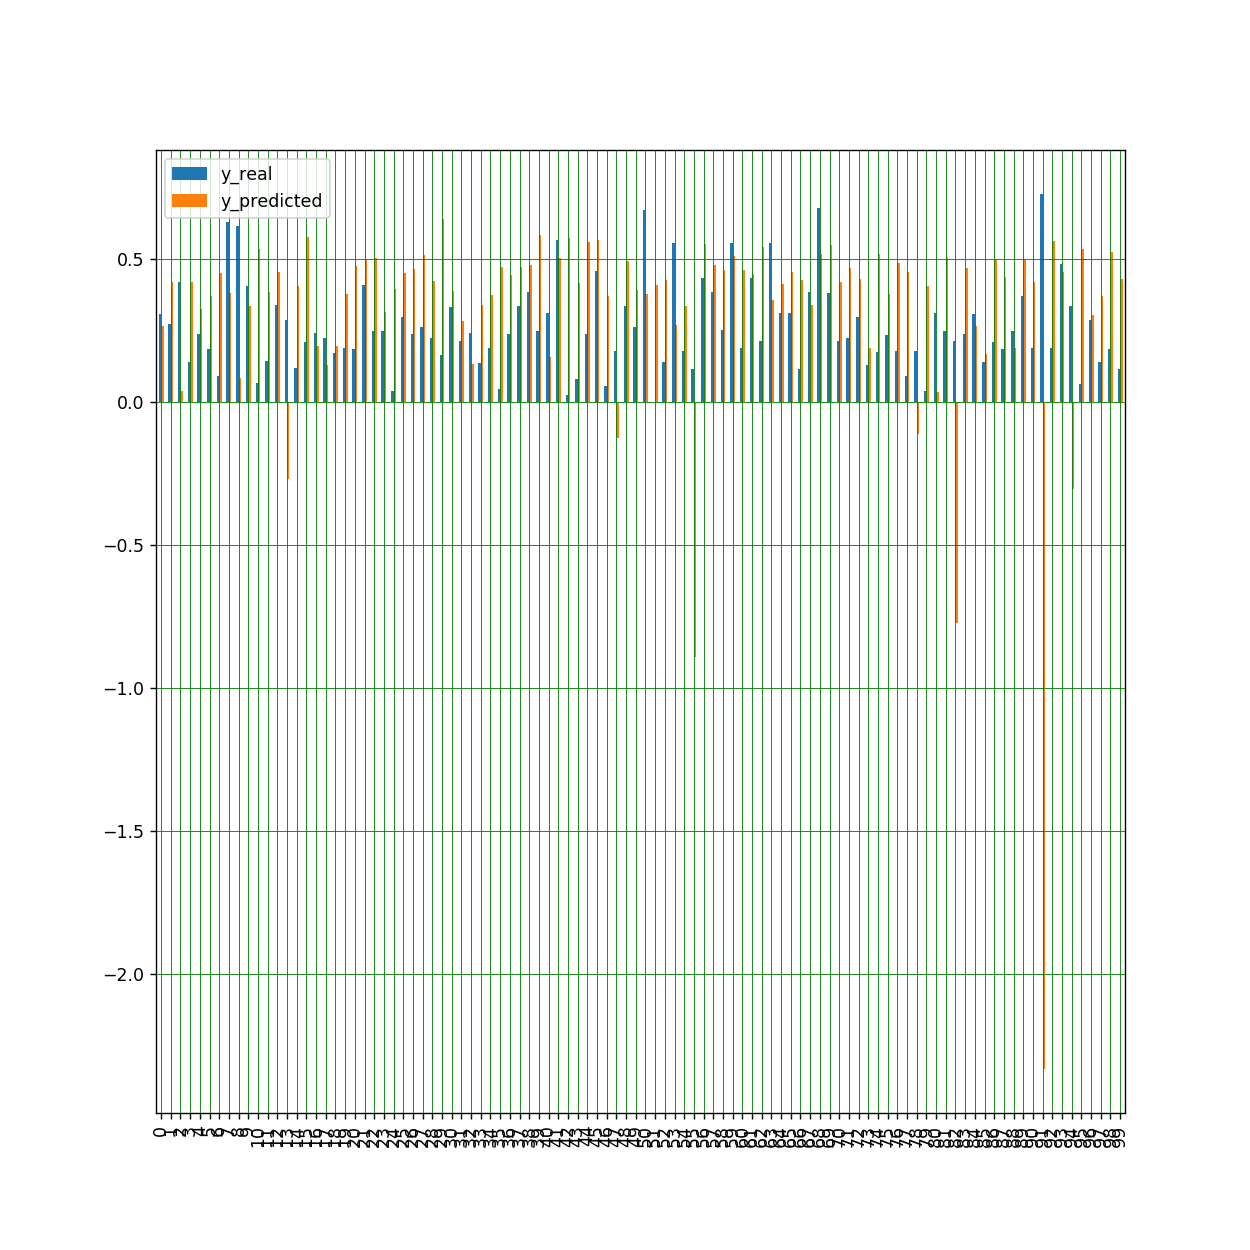

In [96]:
# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_scaled, y_train_scaled)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train_scaled, y_train_predicted)
train_R2 = r2_score(y_train_scaled, y_train_predicted)
test_MSD = mean_squared_error(y_test_scaled, y_test_predicted)
test_R2 = r2_score(y_test_scaled, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_test_scaled.assign(y_predicted=y_test_predicted)
df = df.rename(columns={'Price' : 'y_real'})
DataFrame(df)


df1 = df.head(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [67]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.fit_transform(X_test_scaled)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train_scaled)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)

poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train_scaled, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test_scaled, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
R2 d'entrenament:  0.009228061717870384
R2 de test:  -144.93545927416585


KNN

In [81]:
from sklearn.neighbors import KNeighborsRegressor
R2_test=[]
R2_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train_scaled, y_train_scaled) 
    test_predicted = KNN.predict(X_test_scaled)
    train_predicted = KNN.predict(X_train_scaled)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    R2_test.append(r2_score(y_test_scaled, test_predicted))
    R2_train.append(r2_score(y_train_scaled, train_predicted))
    #accuracy_train.append(KNN.score(X_train, y_train))
    #accuracy_test.append(KNN.score(X_test, y_test))
   # print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD[i-1])
    #print("Error mitjà de test per", i ,"veins: ", test_MSD[i-1])
  #  print("Accuracy d'entrenament per",i,"veins:",accuracy_train[i-1])
 #   print("Accuracy de test per",i,"veins:",accuracy_test[i-1])

In [82]:
R2_train

[1.0,
 0.3327993239753183,
 0.18519901353543522,
 0.12988903963135934,
 0.0984390145454751,
 0.08547391059866793,
 0.07247428289674795,
 0.06486690295047559,
 0.060585278236662266,
 0.053796322698856036,
 0.04836086055096389,
 0.042426032866168306,
 0.04027635775868077,
 0.03814731946874772,
 0.034166578310260265,
 0.031899848518052165,
 0.03038898559294656,
 0.028935730579237262,
 0.02664199925186883,
 0.02604801962541392,
 0.02476563459162029,
 0.024158902369827318,
 0.022796807444701583,
 0.02205503546401688,
 0.021932906583250422]

<IPython.core.display.Javascript object>


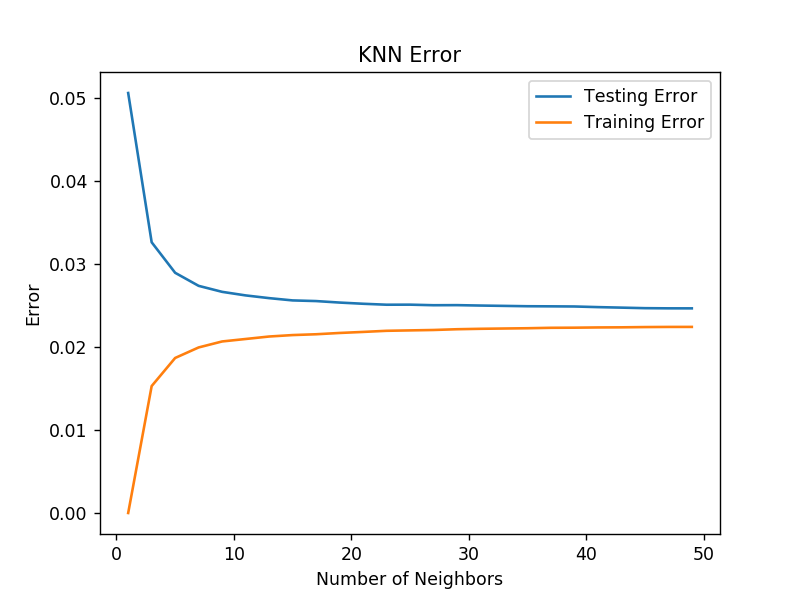

In [83]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


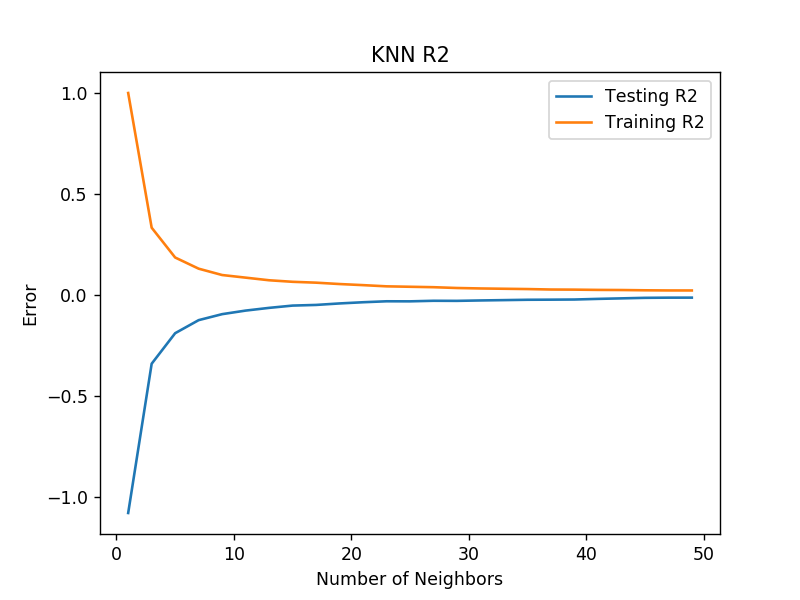

In [84]:
plt.figure()
plt.title('KNN R2')
plt.plot(num, R2_test, label = 'Testing R2')
plt.plot(num, R2_train, label = 'Training R2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random forest

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  15814.199426502813
Error mitjà de test:  15660.252038230718
R2 d'entrenament:  -2.8904506689489704
R2 de test:  -2.8281231313612816


<IPython.core.display.Javascript object>


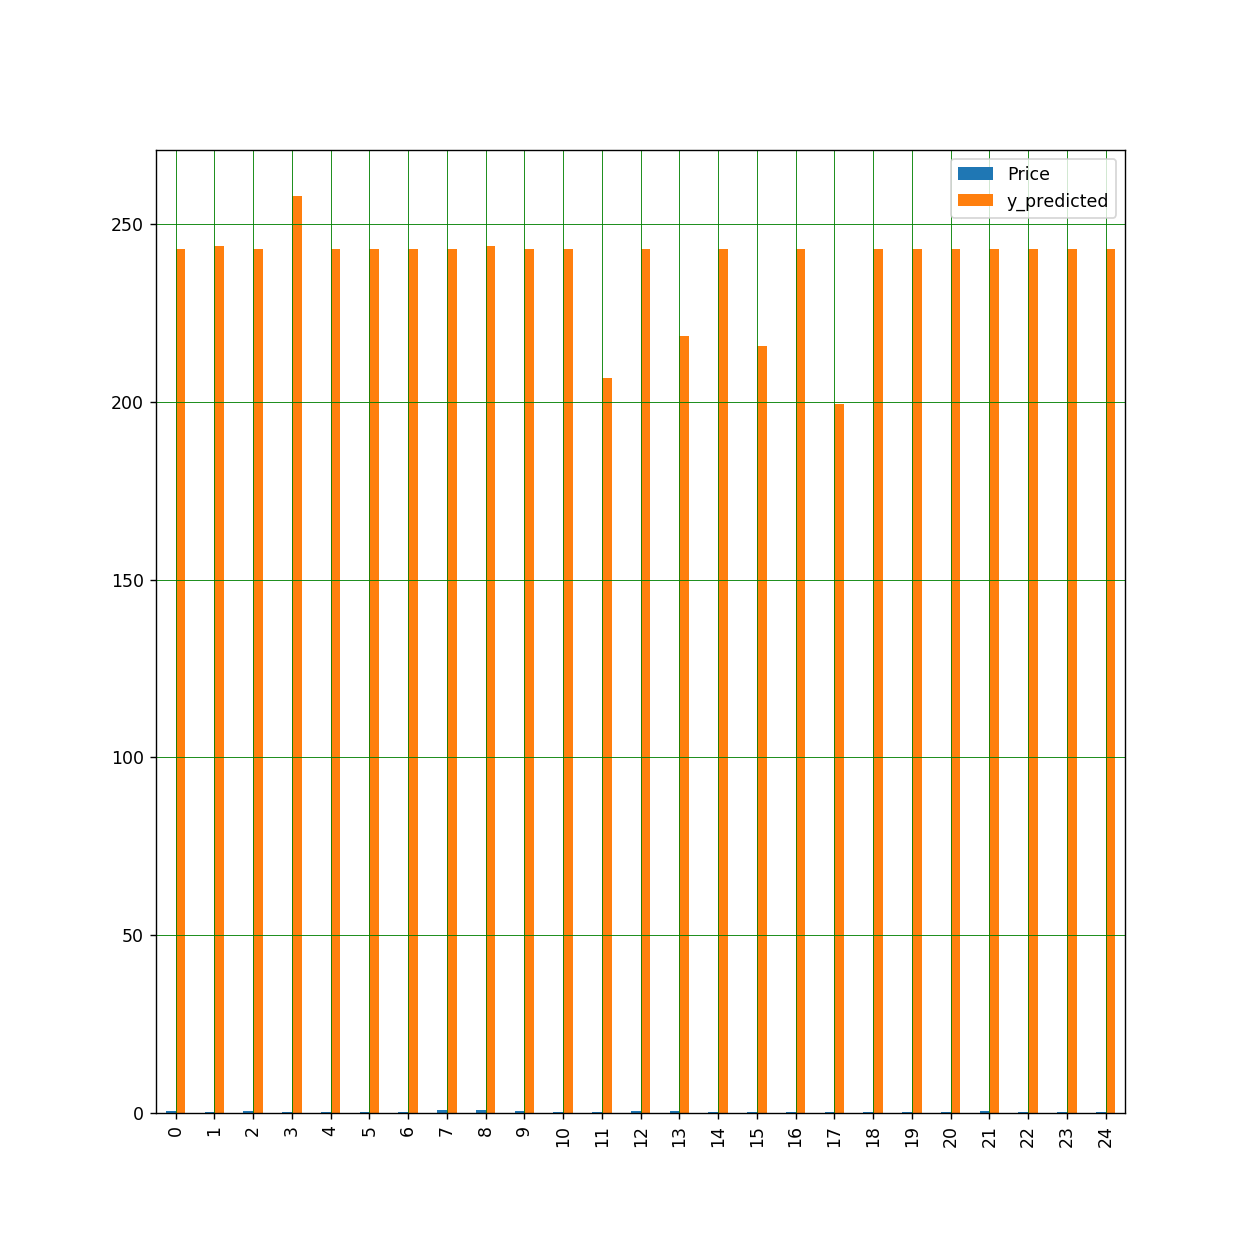

In [49]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_scaled, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_test_scaled.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [37]:
#test=y_test.assign(Price=y_trai)
#nums=list(range(16))
columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"]

Veiem pels resultats de R2 i error que hi ha overfitting

<IPython.core.display.Javascript object>


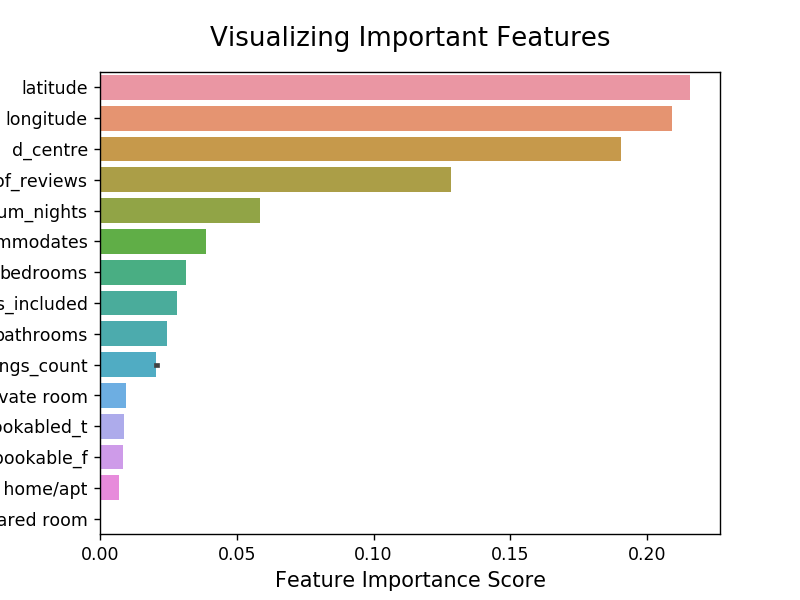

AxesSubplot(0.125,0.11;0.775x0.77)


In [38]:
feature_imp = pd.Series(random_forest.feature_importances_, 
                        index=columns).sort_values(ascending=False)
plt.figure()

print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)
plt.show()

In [40]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(random_forest, threshold=0.150)
X_train_important = selector.fit_transform(X_train_scaled, y_train_scaled)
X_test_important = selector.fit_transform(X_test_scaled, y_test_scaled)
X_train_important=DataFrame(X_train_important)
X_test_important=DataFrame(X_test_important)

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.est

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  0.005116435171943142
Error mitjà de test:  0.033589342558229277
R2 d'entrenament:  0.7769078088515372
R2 de test:  -0.38024558922606944


<IPython.core.display.Javascript object>


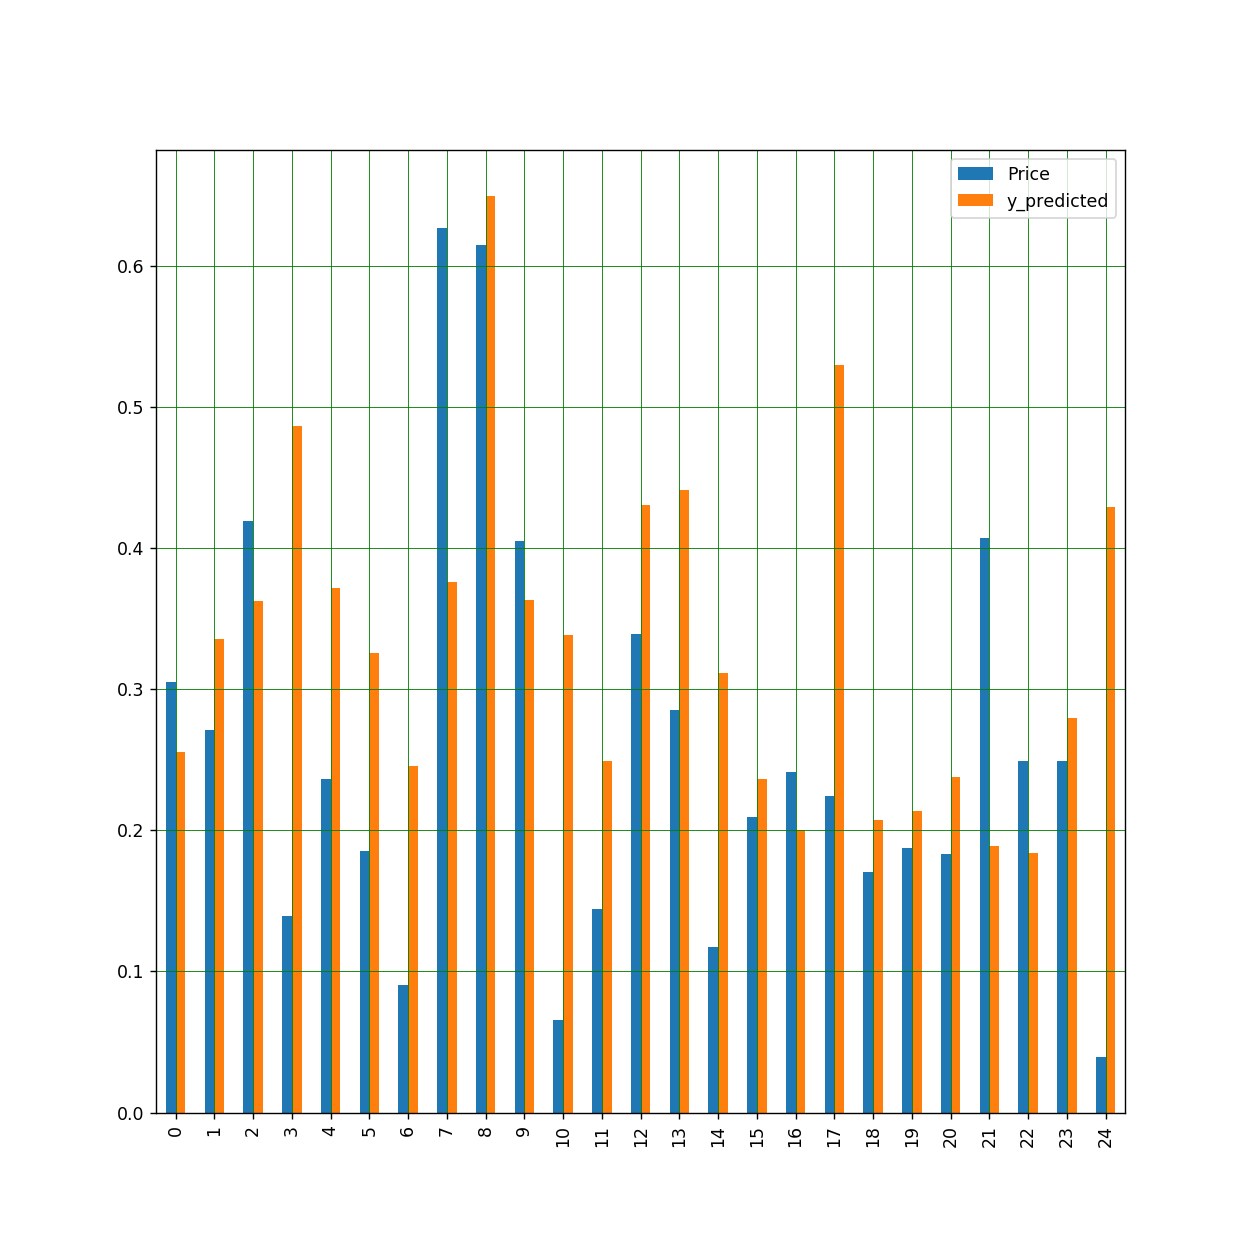

In [41]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_important, y_train_scaled)
test_predicted = random_forest.predict(X_test_important) 
train_predicted = random_forest.predict(X_train_important) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train_scaled, train_predicted)
train_R2 = r2_score(y_train_scaled, train_predicted)
test_MSD = mean_squared_error(y_test_scaled, test_predicted)
test_R2 = r2_score(y_test_scaled, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_test_scaled.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Vriem la profunditat maxima del random forest

In [50]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
max_depths=list(range(1,60))
for max_depth in max_depths:    
    random_forest = RandomForestRegressor(max_depth=max_depth) 
    random_forest.fit(X_train_scaled, y_train_scaled)
    test_predicted = random_forest.predict(X_test_scaled) 
    train_predicted = random_forest.predict(X_train_scaled) 
    test_predicted=test_predicted.reshape(-1,1)
    train_predicted=train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    train_R2.append(r2_score(y_train_scaled, train_predicted))
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    test_R2.append(r2_score(y_test_scaled, test_predicted))



C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

<IPython.core.display.Javascript object>


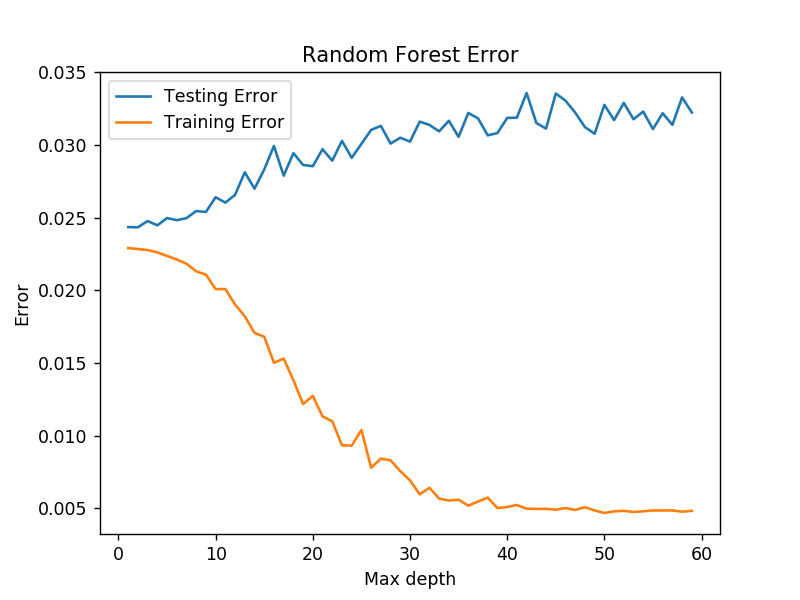

In [51]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(max_depths, test_MSD, label = 'Testing Error')
plt.plot(max_depths, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Error')
plt.show()
plt.savefig("Random_Forest_Error_MaxDepth.jpg")

<IPython.core.display.Javascript object>


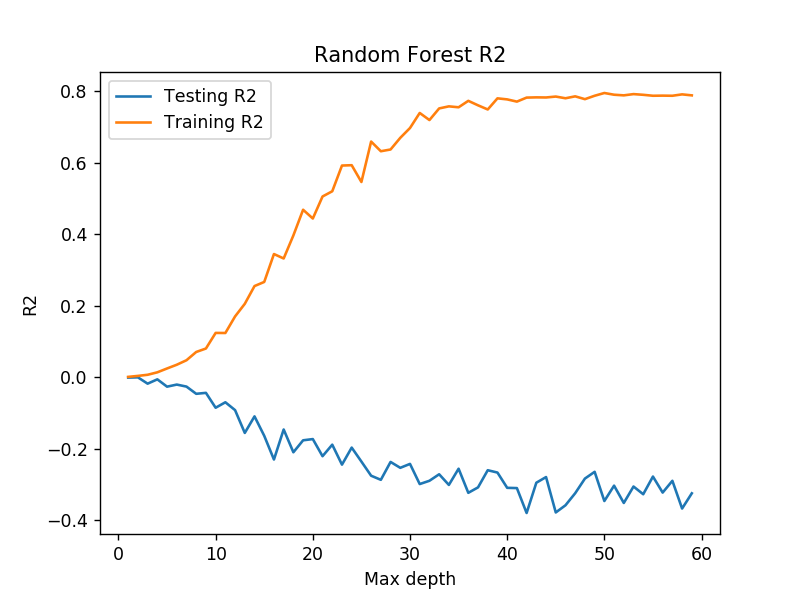

In [52]:
plt.figure()
plt.title('Random Forest R2')
plt.plot(max_depths, test_R2, label = 'Testing R2')
plt.plot(max_depths, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.show()
plt.savefig("Random_Forest_R2_MaxDepth.jpg")

Variem el nombre d'arbres del random forest

In [45]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
num_trees=list(range(3,60))
for trees in num_trees:    
    random_forest = RandomForestRegressor(n_estimators=trees) 
    random_forest.fit(X_train_scaled, y_train_scaled)
    test_predicted = random_forest.predict(X_test_scaled) 
    train_predicted = random_forest.predict(X_train_scaled) 
    test_predicted=test_predicted.reshape(-1,1)
    train_predicted=train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    train_R2.append(r2_score(y_train_scaled, train_predicted))
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    test_R2.append(r2_score(y_test_scaled, test_predicted))



C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

<IPython.core.display.Javascript object>


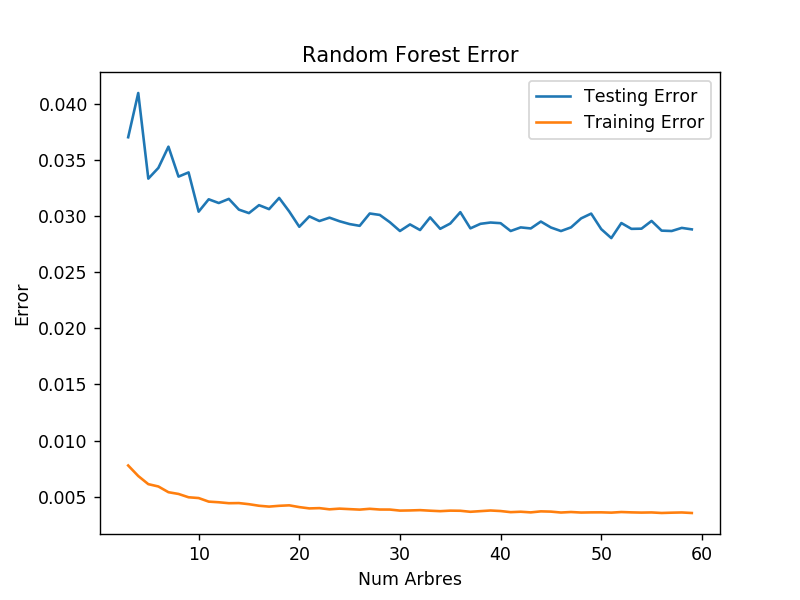

In [46]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(num_trees, test_MSD, label = 'Testing Error')
plt.plot(num_trees, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Num Arbres')
plt.ylabel('Error')
plt.show()
plt.savefig("Random_Forest_Error_NArbres.jpg")

<IPython.core.display.Javascript object>


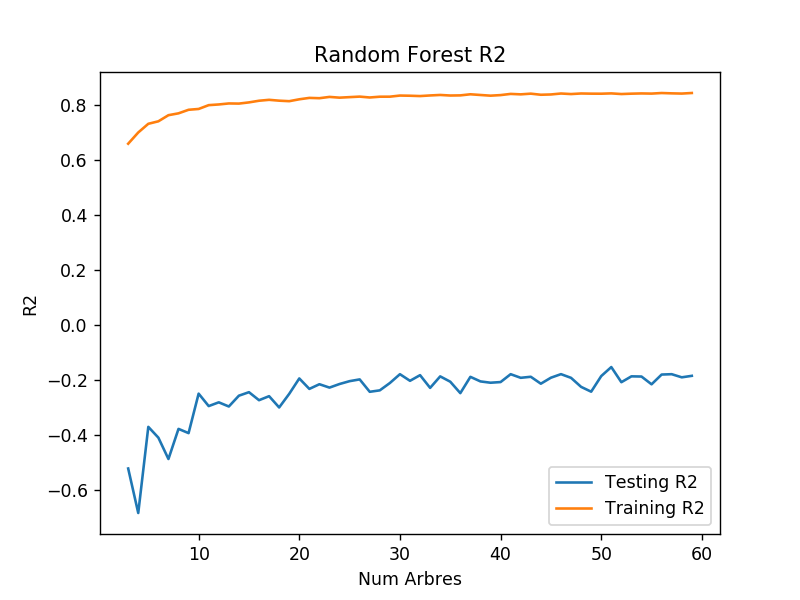

In [47]:
plt.figure()
plt.title('Random Forest R2')
plt.plot(num_trees, test_R2, label = 'Testing R2')
plt.plot(num_trees, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Num Arbres')
plt.ylabel('R2')
plt.show()
plt.savefig("Random_Forest_R2_NArbres.jpg")

Models de regressió:
- Regressió Lineal
- Regressió Multilineal
- Logistic regression
- Descens del gràdient

Ensemble learning
- Random  Forest
- Decision Tree


Mirar lo dels hyperparametres